# Project 2 -- All 5 Categories

In [12]:
from ultralytics import YOLO
from roboflow import Roboflow
import os
import matplotlib.pyplot as plt
from PIL import Image
from shuffle import train_test_split
import pydoc
import cv2

In [3]:

def path_to(*p):
    """
    Takes an arbitrary number of strings and converts it to a path
    with the current working directory automatically tacked onto the front of the path.
    
    Parameters:
        *p (str): Single string or list of strings.
    
    Returns:
        (string): Full path to desired directory/file
    """
    return os.path.join(os.getcwd(), *p)

## Download dataset form Roboflow
For this to work you must update with your own API key. This is only necessary if you want to train it yourself.

In [4]:
def download_dataset(v: int):
    """
    Function that takes the dataset version and downloads if from our Roboflow Project.
    The dataset will be save under project2-dataset-{v}.
    
    Parameters:
        v (int): the version number of the dataset that you want to download
    Returns: 
        None: This function does not return anything.
        
    """
    rf = Roboflow(api_key="jSHmBYOVLG3O81wzzHz3")
    project = rf.workspace("pikavision").project("project2-dataset")
    version = project.version(v)
    dataset = version.download("yolov11")
download_dataset(3)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to project2-dataset-3 in yolov11:: 100%|██████████| 19466/19466 [00:01<00:00, 11528.37it/s]


### Split the data
This splits the data into train, valid, and test datasets at random. 

85% train, 10% validation, 5% test

In [7]:
# Split data into train validation and dest datasets
train_test_split(path_to('project2-dataset-3', 'train'), percentage_test=5, percentage_valid=10)

Total images in src directory: 8319
Abyssinian_149_jpg.rf.7654b20d662a40fe280fa6cc45e2c1af
image-91-_jpg.rf.7fbec487ac98ce210fe7c546591c86e5
image-425-_jpg.rf.17131544f5de196f41187d529e4d1d12
image-114-_jpg.rf.855707d6aecfee5f72cef7a6c46dc8cb
pug_168_jpg.rf.3c728ee2666cc33c6254e5169d89562c
wheaten_terrier_184_jpg.rf.88e4ff19afc4339f597c48f285b34c4d
1-517-_jpeg_jpg.rf.a334b4617635447747435bcb6271f9f6
image-801-_jpg.rf.47d73f70672d111c7a74bd9ebb314f98
pic_650_jpg.rf.f3a59982bca63e3753bbf8b2d8f3a0bd
yorkshire_terrier_165_jpg.rf.2ae5ab9819c4d4f7a2b38c0e0cf86c9a
Birman_17_jpg.rf.2906624d776b50f67609a58b5ffbe25b
image-139-_jpg.rf.5d78d25a57243e3091b45e91fc8888c5
pikachu_00126_jpg.rf.0108e8922715033004f69150c7cc2590
Bombay_186_jpg.rf.f7588545f7e9d3a2f9f0e2dec1c9338b
tello_30_jpeg_jpg.rf.2af1636cc4bc24d0f7b7c728a5f40e0b
american_pit_bull_terrier_128_jpg.rf.34ad5723aa191a34f27515b1f2b4d758
image-423-_jpg.rf.555042d645c06693ba62d3fb6c323e93
wheaten_terrier_109_jpg.rf.7a1aa356af5742eaa6b39b0e69e2

## Test Model Function

Takes the model and a sample image and saves new photo with prediction(s) and bounding boxes.

In [8]:
def test_model(model : YOLO, sample_image : str):
    """
    Takes the model and a sample image and then produces a prediction image.
    The function saves the image to the test_images folder.
    It also shows the predictions using matplotlib.
    
    Parameters:
        model (YOLO): YOLO model that you want to make a prediction with.
        sample_image (str): Sample image to make the prediction on. Can by .png or .jpg
    
    Returns:
        None: This function does not return any value.

    """
    path_to_img = path_to('test_images', sample_image)
    results = model.predict(
        source=path_to_img,
        conf=0.1,
    )

    for r in results:
        name = 'the_detected_' + sample_image
        path_to_predicted_img = path_to('test_images', name)
        r.save(path_to_predicted_img)
    image = Image.open(path_to_predicted_img)
    plt.imshow(image)
    plt.axis('off')
    plt.show()
        

## Train the model 
Takes model and new data. Uses "Transfer Learning" to add/improve category(s) based on new data given. 

In [ ]:
def train_model(model : YOLO, yaml_file : str) -> YOLO:
    """
    Takes the model and a .yaml file and trains the model on the dataset specified in the .yaml file.
    Saves the results of the training to runs/detect
    
    Parameters:
        model (YOLO): The pretrained model that you want want to train ontop of. 
        yaml_file (str): The .yaml file that specifies the data that you want to train on.
        
    Returns: 
        None: This function does not return anything.
    """
    results = model.train(
        data = path_to('project2-dataset-3', yaml_file),
        epochs = 100,
        imgsz = 640,
        save_dir = path_to(),
        device = 'gpu',
        batch=16
        
    )
    

### Load pretrained model
This loads the YOLOv11 model as a starting point

In [9]:
model = YOLO('yolo11n.pt')

In [9]:
# Test the pretrained model
test_model(model, 'the_cat.png')
test_model(model, 'the_dog.png')
test_model(model, 'the_drone.jpg')
test_model(model, 'the_person.png')
test_model(model, 'the_pikachu.jpeg') 

NameError: name 'model' is not defined

In [11]:
train_model(model, 'data.yaml')

Ultralytics 8.3.34 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:gpu (NVIDIA GeForce RTX 3060, 12288MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/home/hunt3041/PikaVision/project2-dataset-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=gpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, 

train: Scanning /home/hunt3041/PikaVision/project2-dataset-5/train/labels... 16541 images, 2027 backgrounds, 0 corrupt: 100%|██████████| 16541/16541 [00:11<00:00, 1382.72it/s]


train: New cache created: /home/hunt3041/PikaVision/project2-dataset-5/train/labels.cache


val: Scanning /home/hunt3041/PikaVision/project2-dataset-5/valid/labels... 1946 images, 241 backgrounds, 0 corrupt: 100%|██████████| 1946/1946 [00:01<00:00, 1186.04it/s]

val: New cache created: /home/hunt3041/PikaVision/project2-dataset-5/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.45G      2.253      3.647       2.38         22        640: 100%|██████████| 1034/1034 [02:25<00:00,  7.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.40it/s]


                   all       1946       2115      0.497      0.448      0.419      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.39G      1.512      2.278      1.803         43        640: 100%|██████████| 1034/1034 [02:19<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.28it/s]


                   all       1946       2115      0.724      0.634      0.707       0.41

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.38G      1.382       1.86      1.678         24        640: 100%|██████████| 1034/1034 [02:16<00:00,  7.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.46it/s]


                   all       1946       2115      0.692      0.644      0.687      0.404

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.37G      1.323      1.697      1.616         45        640: 100%|██████████| 1034/1034 [02:17<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.51it/s]

                   all       1946       2115      0.757      0.681      0.744      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.39G       1.27      1.569      1.566         25        640: 100%|██████████| 1034/1034 [02:16<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.45it/s]

                   all       1946       2115      0.811      0.725      0.806      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.37G      1.224      1.465      1.524         35        640: 100%|██████████| 1034/1034 [02:15<00:00,  7.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.63it/s]

                   all       1946       2115      0.817      0.771      0.832      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.38G      1.193      1.396      1.496         27        640: 100%|██████████| 1034/1034 [02:11<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.33it/s]

                   all       1946       2115      0.831      0.774      0.837      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.36G      1.163      1.341       1.48         23        640: 100%|██████████| 1034/1034 [02:17<00:00,  7.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.40it/s]

                   all       1946       2115      0.879      0.781      0.862      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.39G      1.149      1.292      1.463         35        640: 100%|██████████| 1034/1034 [02:15<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.65it/s]

                   all       1946       2115      0.865      0.797      0.872      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.38G      1.126      1.263      1.446         26        640: 100%|██████████| 1034/1034 [02:19<00:00,  7.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:10<00:00,  6.09it/s]

                   all       1946       2115       0.88      0.816      0.881      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.37G      1.107      1.225      1.427         26        640: 100%|██████████| 1034/1034 [02:17<00:00,  7.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.32it/s]

                   all       1946       2115      0.871      0.813      0.884      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.37G      1.099      1.192      1.424         30        640: 100%|██████████| 1034/1034 [02:19<00:00,  7.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.29it/s]

                   all       1946       2115      0.879      0.829      0.895      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.39G      1.083      1.171      1.409         26        640: 100%|██████████| 1034/1034 [02:14<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.55it/s]

                   all       1946       2115       0.89      0.839        0.9      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.37G      1.069      1.136      1.396         45        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.70it/s]

                   all       1946       2115      0.898      0.842      0.902      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.37G      1.057      1.125      1.391         28        640: 100%|██████████| 1034/1034 [02:06<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  6.83it/s]

                   all       1946       2115      0.891      0.858      0.906      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.42G      1.047      1.101      1.378         24        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.18it/s]

                   all       1946       2115      0.915      0.841      0.909      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.43G      1.039      1.085      1.371         30        640: 100%|██████████| 1034/1034 [02:06<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.52it/s]

                   all       1946       2115      0.918      0.849       0.91      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100       2.4G      1.043      1.076      1.373         26        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.26it/s]

                   all       1946       2115      0.911      0.856      0.916      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       2.4G      1.029      1.059      1.363         18        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.35it/s]

                   all       1946       2115      0.904      0.869      0.921        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.36G      1.024      1.039      1.357         33        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.13it/s]

                   all       1946       2115       0.91      0.858      0.918      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.39G      1.009      1.025      1.347         20        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.55it/s]

                   all       1946       2115      0.936      0.867      0.929      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.37G     0.9952       1.01      1.334         27        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.27it/s]

                   all       1946       2115      0.911      0.878      0.926      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.37G          1      1.008      1.342         25        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.42it/s]

                   all       1946       2115      0.922      0.878      0.927      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.37G     0.9969     0.9963      1.339         28        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.31it/s]

                   all       1946       2115      0.934       0.88      0.932      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.37G     0.9844     0.9813      1.328         27        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.44it/s]

                   all       1946       2115      0.927      0.891      0.938      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.37G     0.9794     0.9763      1.325         24        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.72it/s]

                   all       1946       2115      0.934      0.877      0.936      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.37G     0.9777     0.9662      1.322         24        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.52it/s]

                   all       1946       2115      0.928      0.894      0.939      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.36G      0.967     0.9508      1.316         40        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.14it/s]

                   all       1946       2115      0.946      0.883      0.939      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.42G     0.9624     0.9399      1.315         29        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  6.82it/s]

                   all       1946       2115      0.933       0.89      0.939      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.36G     0.9645     0.9398      1.311         31        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.20it/s]

                   all       1946       2115      0.929        0.9      0.943      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.37G     0.9614      0.929       1.31         28        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.18it/s]

                   all       1946       2115      0.943      0.894      0.943      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.37G      0.955     0.9259      1.306         43        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.60it/s]

                   all       1946       2115      0.934      0.905      0.945      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.37G     0.9481     0.9149      1.301         26        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.37it/s]

                   all       1946       2115      0.934      0.908      0.947       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.39G      0.942      0.908      1.296         26        640: 100%|██████████| 1034/1034 [02:05<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.23it/s]

                   all       1946       2115      0.944      0.903      0.947       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.37G     0.9406     0.8986      1.295         25        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  6.97it/s]

                   all       1946       2115      0.939       0.91       0.95      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.37G     0.9295     0.8856      1.284         30        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.45it/s]

                   all       1946       2115      0.945      0.908      0.949      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.39G     0.9323     0.8867      1.288         28        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.70it/s]

                   all       1946       2115      0.944      0.901      0.949      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.36G     0.9237      0.884      1.285         21        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.47it/s]

                   all       1946       2115       0.94      0.912       0.95      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.37G     0.9214     0.8648      1.282         26        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.74it/s]

                   all       1946       2115      0.943      0.907      0.949      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.37G     0.9174     0.8635      1.277         20        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.75it/s]

                   all       1946       2115      0.942      0.904      0.951       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       2.4G     0.9104     0.8626      1.275         21        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.37it/s]

                   all       1946       2115      0.942       0.91      0.951      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100       2.4G      0.913     0.8444      1.273         35        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.45it/s]

                   all       1946       2115      0.953       0.91      0.953      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.39G     0.9008     0.8383      1.267         35        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.48it/s]

                   all       1946       2115      0.945      0.915      0.953      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.39G     0.9001     0.8361      1.266         35        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.27it/s]

                   all       1946       2115      0.946      0.917      0.952      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.37G     0.8995     0.8351      1.263         32        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.37it/s]

                   all       1946       2115      0.952      0.911      0.954      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      2.35G     0.8939     0.8286       1.26         34        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.54it/s]

                   all       1946       2115      0.956      0.909      0.956       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.42G     0.8952     0.8261      1.261         28        640: 100%|██████████| 1034/1034 [02:02<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.55it/s]

                   all       1946       2115      0.955      0.911      0.955      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.35G     0.8782     0.8136       1.25         29        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.33it/s]

                   all       1946       2115      0.956      0.912      0.956      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.37G     0.8783     0.8039      1.253         31        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.48it/s]

                   all       1946       2115       0.96      0.913      0.956      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.35G     0.8871     0.8084      1.254         25        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.32it/s]

                   all       1946       2115      0.961      0.911      0.957      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.42G     0.8777     0.7913      1.246         24        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.74it/s]

                   all       1946       2115      0.959      0.915      0.957      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.35G     0.8727      0.791      1.243         28        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.55it/s]

                   all       1946       2115      0.957      0.916      0.957      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.37G     0.8671     0.7894      1.241         24        640: 100%|██████████| 1034/1034 [02:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.69it/s]

                   all       1946       2115      0.958      0.914      0.957      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.39G     0.8684     0.7898      1.244         33        640: 100%|██████████| 1034/1034 [02:02<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.20it/s]

                   all       1946       2115      0.961      0.915      0.958       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.37G     0.8651     0.7776      1.239         30        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.23it/s]

                   all       1946       2115      0.964      0.915      0.959       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.37G     0.8634     0.7682      1.234         29        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.27it/s]

                   all       1946       2115      0.964      0.916       0.96      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.37G     0.8534     0.7651      1.233         25        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.44it/s]

                   all       1946       2115      0.961      0.918       0.96      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.39G     0.8528     0.7609      1.231         36        640: 100%|██████████| 1034/1034 [02:06<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.60it/s]

                   all       1946       2115       0.96      0.919       0.96      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.37G     0.8489     0.7604      1.229         25        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.31it/s]

                   all       1946       2115       0.96       0.92       0.96      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.37G      0.846     0.7534      1.226         31        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.35it/s]

                   all       1946       2115      0.958      0.923       0.96      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.37G     0.8381     0.7448      1.223         19        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.28it/s]

                   all       1946       2115      0.959      0.925      0.962      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.35G     0.8399     0.7436      1.223         34        640: 100%|██████████| 1034/1034 [02:05<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.51it/s]

                   all       1946       2115      0.961      0.924      0.962      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.39G     0.8393     0.7369      1.219         26        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.11it/s]

                   all       1946       2115       0.96      0.925      0.962      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.35G     0.8257     0.7236      1.213         27        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.29it/s]

                   all       1946       2115       0.96      0.925      0.962        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.37G     0.8321     0.7331      1.216         26        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.64it/s]

                   all       1946       2115       0.96      0.926      0.963      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      2.39G     0.8225     0.7161      1.212         26        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.52it/s]

                   all       1946       2115      0.959      0.926      0.963      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.37G     0.8254     0.7186      1.211         29        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  6.93it/s]

                   all       1946       2115      0.962      0.922      0.964      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.37G     0.8249     0.7158      1.211         30        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.56it/s]

                   all       1946       2115       0.96      0.923      0.964      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.37G     0.8205     0.7035      1.205         32        640: 100%|██████████| 1034/1034 [02:05<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.66it/s]

                   all       1946       2115       0.96      0.923      0.964      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.38G     0.8079     0.6933      1.201         29        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.24it/s]

                   all       1946       2115      0.962      0.922      0.964      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.37G     0.8099     0.6952      1.202         38        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:09<00:00,  6.61it/s]

                   all       1946       2115      0.962      0.922      0.964      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.37G     0.8101     0.6942      1.207         22        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.06it/s]

                   all       1946       2115      0.962      0.923      0.964      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.37G     0.7991     0.6801      1.194         28        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.18it/s]

                   all       1946       2115      0.962      0.925      0.965      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.35G     0.7966     0.6804      1.193         24        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:07<00:00,  7.68it/s]

                   all       1946       2115      0.961      0.925      0.965      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.37G     0.7902     0.6819      1.191         26        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.33it/s]

                   all       1946       2115      0.962      0.923      0.965      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.39G     0.7888     0.6671      1.187         23        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.35it/s]

                   all       1946       2115      0.963      0.921      0.965      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.37G      0.783     0.6625       1.18         28        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.20it/s]

                   all       1946       2115      0.965      0.922      0.965      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.39G     0.7869     0.6608      1.185         37        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.48it/s]

                   all       1946       2115      0.965      0.923      0.965      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.37G     0.7732     0.6519      1.177         28        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.22it/s]

                   all       1946       2115      0.966      0.923      0.966      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      2.37G     0.7739     0.6471      1.176         30        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.20it/s]

                   all       1946       2115      0.966      0.924      0.966      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.37G     0.7705     0.6429      1.174         25        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.43it/s]

                   all       1946       2115      0.967      0.923      0.966      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.37G     0.7662     0.6363       1.17         30        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.02it/s]

                   all       1946       2115      0.966      0.924      0.966      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.37G     0.7633     0.6318      1.171         27        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.32it/s]

                   all       1946       2115      0.966      0.925      0.966       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.39G     0.7611     0.6375       1.17         28        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.23it/s]

                   all       1946       2115      0.967      0.924      0.966       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.37G     0.7576     0.6314      1.166         35        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.17it/s]

                   all       1946       2115      0.967      0.923      0.967       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.37G      0.754     0.6214      1.165         28        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.44it/s]

                   all       1946       2115      0.967      0.923      0.967      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.37G     0.7563      0.625      1.169         31        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  6.99it/s]

                   all       1946       2115      0.968      0.923      0.967      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      2.35G     0.7492      0.612       1.16         31        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.16it/s]

                   all       1946       2115      0.969      0.923      0.967      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.37G      0.743     0.6085      1.156         27        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.44it/s]

                   all       1946       2115       0.97      0.924      0.967      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      2.35G     0.7397     0.5998       1.15         29        640: 100%|██████████| 1034/1034 [02:05<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.16it/s]

                   all       1946       2115       0.97      0.923      0.967      0.811


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.37G     0.6305     0.3992      1.099         13        640: 100%|██████████| 1034/1034 [02:05<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.21it/s]

                   all       1946       2115      0.969      0.923      0.967      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      2.35G     0.6122     0.3809      1.085         16        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.46it/s]

                   all       1946       2115      0.969      0.924      0.967      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.37G     0.6021     0.3681       1.08         13        640: 100%|██████████| 1034/1034 [02:04<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.12it/s]

                   all       1946       2115       0.97      0.924      0.968      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      2.35G     0.5971      0.366      1.077         17        640: 100%|██████████| 1034/1034 [02:05<00:00,  8.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.34it/s]

                   all       1946       2115       0.97      0.924      0.968      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.37G     0.5928     0.3601      1.073         10        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.51it/s]

                   all       1946       2115       0.97      0.924      0.968      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      2.35G     0.5836     0.3509      1.065         14        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.55it/s]

                   all       1946       2115       0.97      0.924      0.968      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.37G     0.5841     0.3489      1.066         14        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.05it/s]

                   all       1946       2115      0.968      0.925      0.968      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      2.36G      0.576     0.3439      1.063         12        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.33it/s]

                   all       1946       2115      0.969      0.925      0.968      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.37G      0.571     0.3396      1.056         16        640: 100%|██████████| 1034/1034 [02:02<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.56it/s]

                   all       1946       2115      0.969      0.925      0.969      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      2.35G     0.5653     0.3345      1.053         13        640: 100%|██████████| 1034/1034 [02:03<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.57it/s]

                   all       1946       2115      0.969      0.925      0.968      0.818



100 epochs completed in 3.736 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.34 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:gpu (NVIDIA GeForce RTX 3060, 12288MiB)
YOLO11n summary (fused): 238 layers, 2,583,127 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 61/61 [00:08<00:00,  7.13it/s]


                   all       1946       2115      0.969      0.925      0.968      0.818
                   cat        254        257      0.991      0.992      0.994       0.93
                   dog        495        495      0.988      0.986      0.994      0.861
                 drone        469        499      0.976      0.971      0.991      0.709
                person        357        728      0.933      0.758      0.896      0.741
               pikachu        130        136      0.958      0.919      0.967      0.849
Speed: 0.1ms preprocess, 1.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train



image 1/1 /home/casager/PikaVision/test_images/the_cat.png: 384x640 1 cat, 37.1ms
Speed: 3.1ms preprocess, 37.1ms inference, 370.9ms postprocess per image at shape (1, 3, 384, 640)


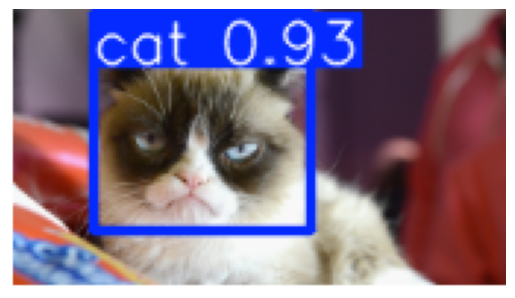


image 1/1 /home/casager/PikaVision/test_images/the_dog.png: 416x640 1 dog, 32.9ms
Speed: 1.2ms preprocess, 32.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


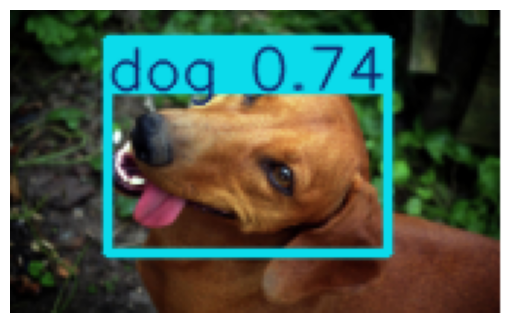


image 1/1 /home/casager/PikaVision/test_images/the_drone.jpg: 384x640 1 drone, 10.8ms
Speed: 1.5ms preprocess, 10.8ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


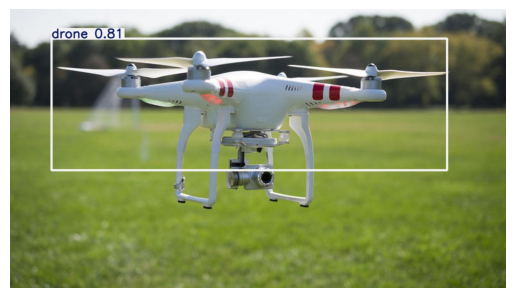


image 1/1 /home/casager/PikaVision/test_images/the_person.png: 448x640 3 persons, 26.6ms
Speed: 1.5ms preprocess, 26.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


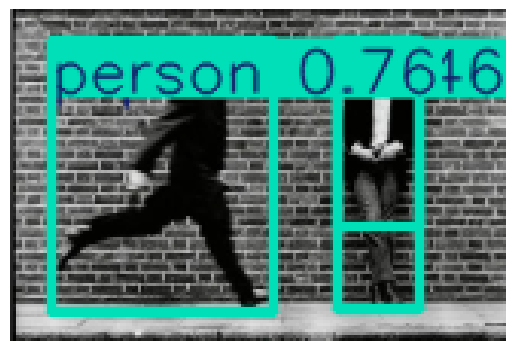


image 1/1 /home/casager/PikaVision/test_images/the_pikachu.jpeg: 320x640 1 pikachu, 26.3ms
Speed: 1.1ms preprocess, 26.3ms inference, 0.8ms postprocess per image at shape (1, 3, 320, 640)


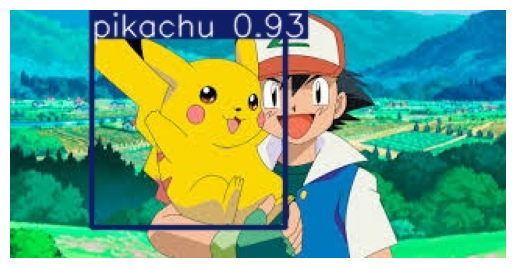


image 1/1 /home/casager/PikaVision/test_images/dog2.jpg: 640x480 1 dog, 32.4ms
Speed: 1.5ms preprocess, 32.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)


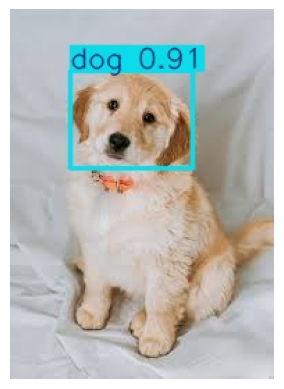


image 1/1 /home/casager/PikaVision/test_images/person2.jpg: 384x640 1 person, 9.9ms
Speed: 1.5ms preprocess, 9.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


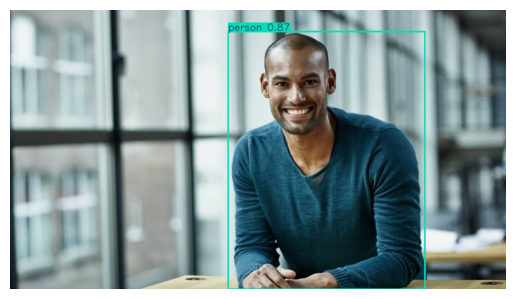

In [10]:
best_model = YOLO(path_to('runs', 'detect', '5_categories_no_aug', 'weights', 'best.pt'))
test_model(best_model, 'the_cat.png')
test_model(best_model, 'the_dog.png')
test_model(best_model, 'the_drone.jpg')
test_model(best_model, 'the_person.png')
test_model(best_model, 'the_pikachu.jpeg')
test_model(best_model, 'dog2.jpg')
test_model(best_model, 'person2.jpg')

In [ ]:
# Load custom model
new_model = YOLO(path_to('runs', 'detect', '5_categories_no_aug', 'weights', 'best.pt'))


image 1/1 /home/hunt3041/PikaVision/test_images/the_cat.png: 384x640 1 cat, 13.9ms
Speed: 2.0ms preprocess, 13.9ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)


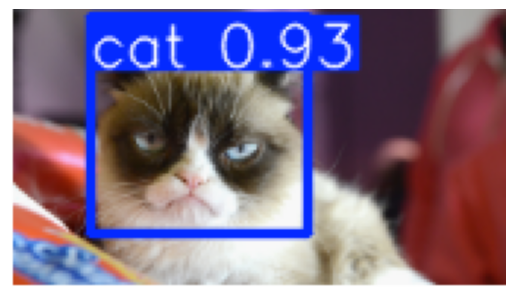


image 1/1 /home/hunt3041/PikaVision/test_images/the_dog.png: 416x640 1 dog, 7.4ms
Speed: 1.0ms preprocess, 7.4ms inference, 0.9ms postprocess per image at shape (1, 3, 416, 640)


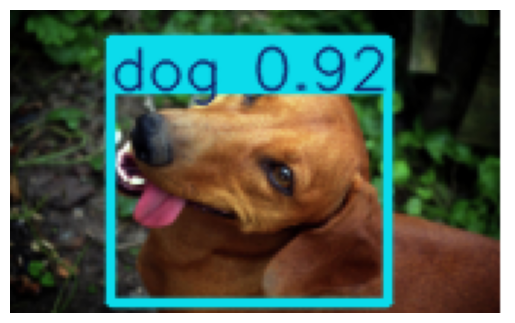


image 1/1 /home/hunt3041/PikaVision/test_images/the_drone.jpg: 384x640 1 drone, 5.5ms
Speed: 1.1ms preprocess, 5.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


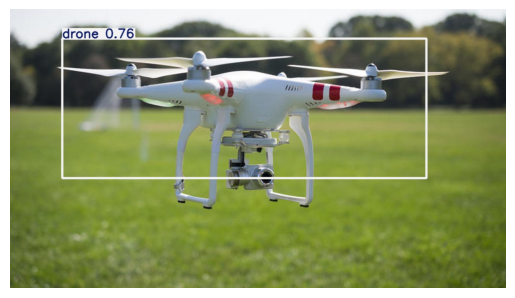


image 1/1 /home/hunt3041/PikaVision/test_images/the_person.png: 448x640 3 persons, 5.9ms
Speed: 1.6ms preprocess, 5.9ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


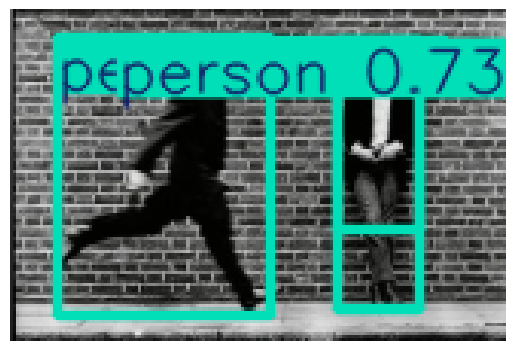


image 1/1 /home/hunt3041/PikaVision/test_images/the_pikachu.jpeg: 320x640 1 pikachu, 6.2ms
Speed: 0.9ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)


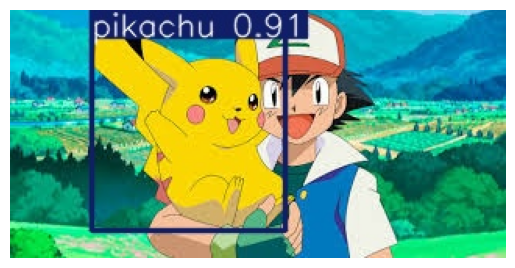


image 1/1 /home/hunt3041/PikaVision/test_images/dog2.jpg: 640x480 1 dog, 7.8ms
Speed: 1.0ms preprocess, 7.8ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 480)


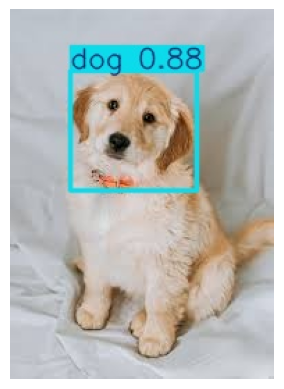


image 1/1 /home/hunt3041/PikaVision/test_images/person2.jpg: 384x640 1 person, 5.6ms
Speed: 1.1ms preprocess, 5.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


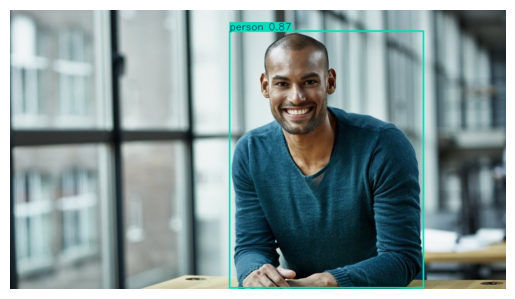

In [19]:
# test custom model
test_model(new_model, 'the_cat.png')
test_model(new_model, 'the_dog.png')
test_model(new_model, 'the_drone.jpg')
test_model(new_model, 'the_person.png')
test_model(new_model, 'the_pikachu.jpeg')
test_model(new_model, 'dog2.jpg')
test_model(new_model, 'person2.jpg')

In [14]:
results = new_model.val(data=path_to('project2-dataset-5', 'data.yaml'))

Ultralytics 8.3.34 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 12288MiB)


val: Scanning /home/hunt3041/PikaVision/project2-dataset-5/valid/labels.cache... 1946 images, 241 backgrounds, 0 corrupt: 100%|██████████| 1946/1946 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 122/122 [00:12<00:00,  9.64it/s]


                   all       1946       2115      0.969      0.925      0.968      0.817
                   cat        254        257      0.991      0.992      0.994      0.929
                   dog        495        495      0.988      0.986      0.994      0.862
                 drone        469        499      0.976      0.971      0.991      0.707
                person        357        728      0.932      0.758      0.895      0.742
               pikachu        130        136      0.958      0.919      0.967      0.847
Speed: 0.2ms preprocess, 3.1ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val


Function Used for Live Detection

In [13]:
def live_detection(model: YOLO):
    """
    Capture live video feed from the laptop camera and use YOLO model for object detection.
    
    Parameters:
        model (YOLO): The YOLO model that you want to use for live detection.
        
    Returns:
        None: Displays the live feed with detected objects.
    """
    # Start video capture (0 is the default camera on most systems)
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("Error: Camera not found.")
        return
    
    print("Press 'q' to quit.")
    
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Failed to capture image.")
            break
        
        # Convert the frame to RGB for YOLO model compatibility
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Convert the frame to a PIL image for YOLO
        pil_image = Image.fromarray(rgb_frame)
        
        # Perform inference with the YOLO model
        results = model(pil_image)
        
        # Draw the results on the frame
        annotated_frame = results[0].plot()  # Annotated image with detected objects
        
        # Display the annotated frame
        cv2.imshow("YOLO Live Detection", annotated_frame)
        
        # Press 'q' to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release the camera and close the window
    cap.release()
    cv2.destroyAllWindows()